In [1]:
!mkdir -p ~/.kaggle
!cp kaggle datasets.json ~/.kaggle

cp: cannot stat 'kaggle': No such file or directory
cp: cannot stat 'datasets.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:14<00:00, 93.7MB/s]
100% 1.06G/1.06G [00:14<00:00, 77.6MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras.regularizers import l2

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [8]:
#genreater
train_ds=keras.utils.image_dataset_from_directory(
 directory='/content/train',
 labels='inferred',
 label_mode='int',
 batch_size=16,
 image_size=(128,128)
)
validation_ds=keras.utils.image_dataset_from_directory(
 directory='/content/test',
 labels='inferred',
 label_mode='int',
 batch_size=16,
 image_size=(128,128)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#normalize
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [10]:
#create CNN Model
model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,638,113 (6.25 MB)

 Trainable params: 1,637,889 (6.25 MB)

 Non-trainable params: 224 (896.00 B)

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               restore_best_weights=True)

In [14]:
history = model.fit(train_ds,
                    epochs=20,
                    validation_data=validation_ds,
                    callbacks=[early_stopping])

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 439s 348ms/step - accuracy: 0.6114 - loss: 2.9159 - val_accuracy: 0.7578 - val_loss: 1.7192
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 414s 326ms/step - accuracy: 0.7338 - loss: 1.5206 - val_accuracy: 0.7654 - val_loss: 0.9981
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 414s 331ms/step - accuracy: 0.7808 - loss: 0.9052 - val_accuracy: 0.8030 - val_loss: 0.7180
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 419s 335ms/step - accuracy: 0.8136 - loss: 0.6593 - val_accuracy: 0.8112 - val_loss: 0.6201
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 408s 327ms/step - accuracy: 0.8434 - loss: 0.5502 - val_accuracy: 0.8142 - val_loss: 0.6071
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 408s 326ms/step - accuracy: 0.8734 - loss: 0.4840 - val_accuracy: 0.8214 - val_loss: 0.5916
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 443s 327ms/step - accuracy: 0.8938 - loss: 0.4325 - val_accuracy: 0.8140 - val_loss: 0.6341
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 442s 327ms/step - ac

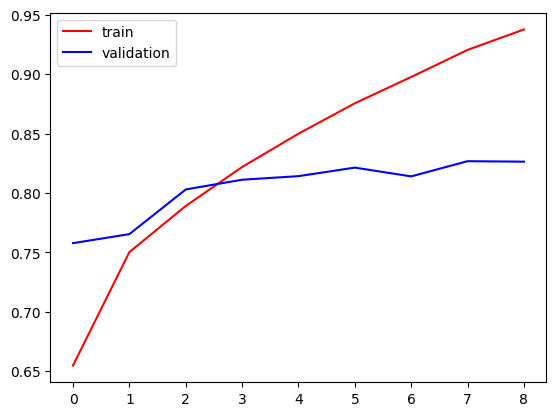

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

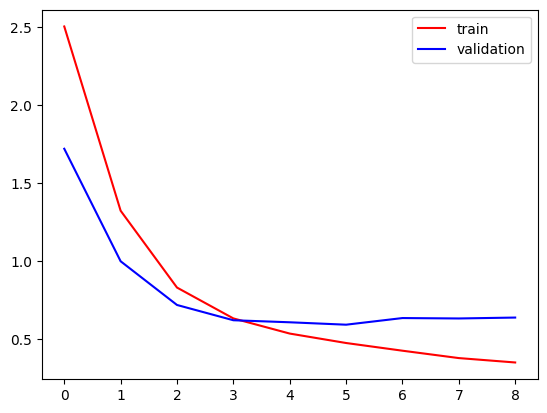

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
import cv2

In [24]:
test_image=cv2.imread('/content/gog2.jpg')

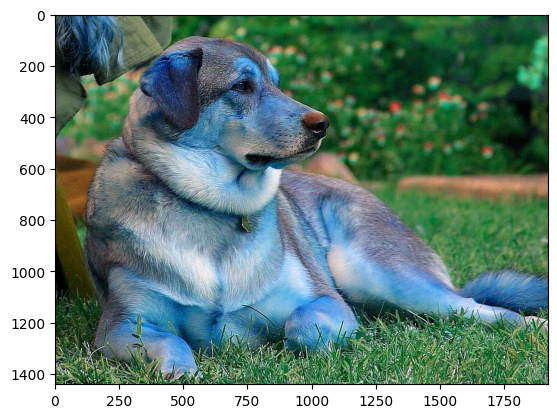

In [25]:
import matplotlib.pyplot as plt
plt.imshow(test_image)

In [26]:
test_image.shape

(1440, 1920, 3)

In [27]:
test_image=cv2.resize(test_image,(128,128))

In [28]:
test_image=test_image.reshape(1,128,128,3)

In [29]:
model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.]], dtype=float32)

In [30]:
test_img=cv2.imread('/content/cati.jpeg')

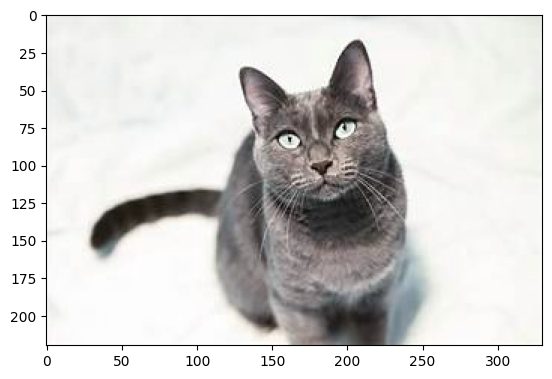

In [31]:
plt.imshow(test_img)

In [32]:
test_img=cv2.resize(test_img,(128,128))

In [33]:
test_img.shape

(128, 128, 3)

In [34]:
test_img = test_img.reshape(1,128,128, 3)

In [35]:
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[1.]], dtype=float32)